# PCA

PCA is a stastical procedure for dimensionality reduction. It uses feature extraction.Feature extraction transforms the data in the high-dimensional space to a space of fewer dimensions. Steps to compute PCA-:
1.  Organize the data set
2. Find the covariance matrix
3.  Find the eigenvectors and eigenvalues of the covariance matrix
4. Choose the eigenvectors corresponding to the highest eigenvalues
5. Project the data samples in a higher dimensional space to lower dimensional space by multiplying with the eigenvectors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from mpl_toolkits.mplot3d import axes3d

In [2]:
df=pd.read_csv("/home/sourojit/tfmodel/ge.csv")

Will be using a stock prediction dataset.

In [42]:
in_data=df.drop(["Close","Volume"],axis=1)

In [43]:
label=df.drop(["Open","High","Low","Volume"],axis=1)

In [6]:
in_data["Open"] = pd.to_numeric(in_data["Open"])
in_data.loc[:,("Result")]=in_data["Open"]<=label["Close"]
in_data.loc[:,("Result")]=in_data["Result"].astype(int)

Add another feature to the dataset "Result".
The value in the feature "Result" depends on the comparison between the features "Open" and "Close".
"Result" takes on value 1 if "Close" is greater than or equal to "Open", else takes on the value 0.

In [8]:
pro=in_data.loc[in_data["Result"]==1] 
loss=in_data.loc[in_data["Result"]==0]
in_data.loc[:,("Covar")]=in_data["Open"]<=label["Close"]

pro consists of the samples which represents days when profit was observed.loss consists of the samples which represents days when loss was observed.

In [11]:
#in_data["Low"] = pd.to_numeric(in_data["Low"])
#in_data["High"] = pd.to_numeric(in_data["High"])
inputx=in_data.loc[:,["Open","High","Low"]].as_matrix()

Construct a matrix out of the in_data dataset.The size of the matrix is n X 3 where n represents the no. of samples in the dataset.

In [14]:
pro_mat=pro.loc[:,["Open","High","Low"]].as_matrix()

In [15]:
loss_mat=loss.loc[:,["Open","High","Low"]].as_matrix()

In [34]:
pro_mat_list=[]
loss_mat_list=[]
for i in pro_mat:
    pro_mat_list.append(i)

for j in loss_mat:
    loss_mat_list.append(j)
    

In [36]:
pro_mat_list_x=[]
pro_mat_list_y=[]
pro_mat_list_z=[]
loss_mat_list_x=[]
loss_mat_list_y=[]
loss_mat_list_z=[]

In [37]:
for p in pro_mat_list:
    pro_mat_list_x.append(p[0])
    pro_mat_list_y.append(p[1])
    pro_mat_list_z.append(p[2])

for l in loss_mat_list:
    loss_mat_list_x.append(l[0])
    loss_mat_list_y.append(l[1])
    loss_mat_list_z.append(l[2])

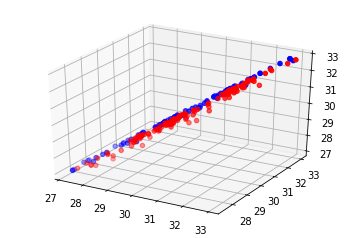

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pro_mat_list_x,pro_mat_list_y,pro_mat_list_z, color="blue", label="Profit")
ax.scatter(loss_mat_list_x,loss_mat_list_y,loss_mat_list_z, color="red", label="Loss")
    
plt.show()

As we can see above that most of the data points lie on a single plane in the above 3-D plot but there are some points which donot lie on the plane. The main objective will be to plot all these points on a 2-D plane.That is what PCA does.It reduces the dimensionality of the dataset by choosing the most relevant features.

In [16]:
inputy=in_data.loc[:,("Result")].as_matrix()

Construct pro_mat, loss_mat and inputy matrices out of pro, loss and in_data datasets.  

In [17]:
n=inputx.size/3
n

250.0

The size of the inputx matrix is 250 X 3.

In [18]:
pro_x=pro_mat[:,0]
pro_y=pro_mat[:,1]
pro_z=pro_mat[:,2]

loss_x=loss_mat[:,0]
loss_y=loss_mat[:,1]
loss_z=loss_mat[:,2]

Extract out the individual features of pro_mat and loss_mat.

In [19]:
inputx_t=inputx.T
covar=np.cov(inputx_t)

Construct the covariance matrix out of the inputx matrix.

In [20]:
covar

array([[ 1.50394562,  1.49006524,  1.5237193 ],
       [ 1.49006524,  1.50132124,  1.51947522],
       [ 1.5237193 ,  1.51947522,  1.56694442]])

In [21]:
u,s,v=np.linalg.svd(covar)
u_red=u[:,1:3]

u returns eigen vectors of the covariance matrix. u_red consists of two eigen vectors of the covariance matrix. We have selected two eigen vectors because we want to project the data on the 2-D plane.

In [22]:
u_red

array([[ 0.16134993, -0.80302109],
       [-0.77981304,  0.25254108],
       [ 0.60486182,  0.53979638]])

In [25]:
input_xx=inputx.dot(u_red)

input_xx returns the coordinates of the 3-D points projected on a 2-D space.

In [27]:
pro_list=[]
loss_list=[]

In [28]:
for j in range(int(n)):
    if inputy[j]==1:
        pro_list.append(input_xx[j])
    else:
        loss_list.append(input_xx[j])

In [30]:
pro_x=[]
pro_y=[]
loss_x=[]
loss_y=[]

In [31]:
for p in pro_list:
    pro_x.append(p[0])
    pro_y.append(p[1]) 

for l in loss_list:
    loss_x.append(l[0])
    loss_y.append(l[1])

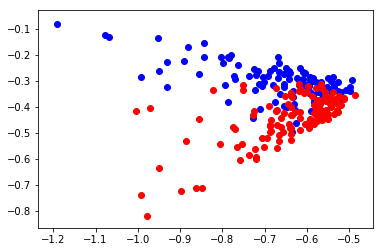

In [32]:
plt.scatter(pro_x,pro_y, color="blue", label="Profit")
plt.scatter(loss_x,loss_y, color="red", label="Loss")
    
plt.show()